![](woman.png)

Fonte: autoria própria, 2023.

**INTRODUÇÃO**

Explorando a interseção entre maternidade e carreira acadêmica no Brasil. Este notebook, parte do curso de Fundamentos de Python e Análise de Dados da Reprograma, utiliza dados do IBGE de 2021 para analisar mulheres, mães e pesquisadoras (mestrandas e doutorandas). Destacando a falta de informações específicas, o projeto ressalta a importância de aprofundar a discussão sobre a maternidade na comunidade acadêmica.

---------------------------------------------------------------------------------------------------------------------------------------------

**COLETA DOS DADOS**

As bases de dados do IBGE que foram utilizadas são distintas e cada uma fornece informações específicas:
- Dados da população por idada e sexo (populacao_total.csv)
- Dados do total de mulheres com 15 anos ou mais por filhos tidos (dados_maes.csv)
- Dados de pessoas com ní­vel de instrução mais elevado por sexo (ibge_educ.csv)

--------------------------------------------------------------------------------------------------------------

**PROCESSAMENTO DOS DADOS**

Importando das bibliotecas que serão utilizadas

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Leitura dos arquivos CSV

In [81]:
df_populacao = pd.read_csv('datasets/populacao_total.csv', encoding='latin1', delimiter=';')
df_mulheres_maes = pd.read_csv('datasets/dados_maes.csv', encoding='latin1', delimiter=';')
df_discentes = pd.read_csv('datasets/ibge_educ.csv', encoding='latin1', delimiter=';')

Compreensão dos dados

In [82]:
df_populacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Sexo    2 non-null      object
 1   UF      2 non-null      object
 2   Total   2 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 180.0+ bytes


In [83]:
df_mulheres_maes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   UF         1 non-null      object
 1   Com filho  1 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 148.0+ bytes


In [84]:
df_discentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Sexo                   2 non-null      object
 1   UF                     2 non-null      object
 2   Doutorado              2 non-null      int64 
 3   Mestrado               2 non-null      int64 
 4   Superior de graduacao  2 non-null      int64 
dtypes: int64(3), object(2)
memory usage: 212.0+ bytes


In [87]:
print("Colunas em df_populacao:", df_populacao.columns)
print("Colunas em df_mulheres_maes:", df_mulheres_maes.columns)
print("Colunas em df_discentes:", df_discentes.columns)

Colunas em df_populacao: Index(['Sexo', 'UF', 'Total'], dtype='object')
Colunas em df_mulheres_maes: Index(['UF', 'Com filho'], dtype='object')
Colunas em df_discentes: Index(['Sexo', 'UF', 'Doutorado', 'Mestrado', 'Superior de graduacao'], dtype='object')


Merge dos dataframes

In [90]:
df_merged = pd.merge(df_populacao, df_mulheres_maes, on="UF")
df_merged = pd.merge(df_merged, df_discentes, on="UF")
print(df_merged)

      Sexo_x      UF      Total  Com filho    Sexo_y  Doutorado  Mestrado  \
0   Feminino  Brasil  109045840   51416082    Homens     122836    277942   
1   Feminino  Brasil  109045840   51416082  Mulheres      95885    288085   
2  Masculino  Brasil  104271799   51416082    Homens     122836    277942   
3  Masculino  Brasil  104271799   51416082  Mulheres      95885    288085   

   Superior de graduacao  
0                5233313  
1                7445696  
2                5233313  
3                7445696  


**VISUALIZAÇÕES**

1. Total Geral de Mulheres no Brasil

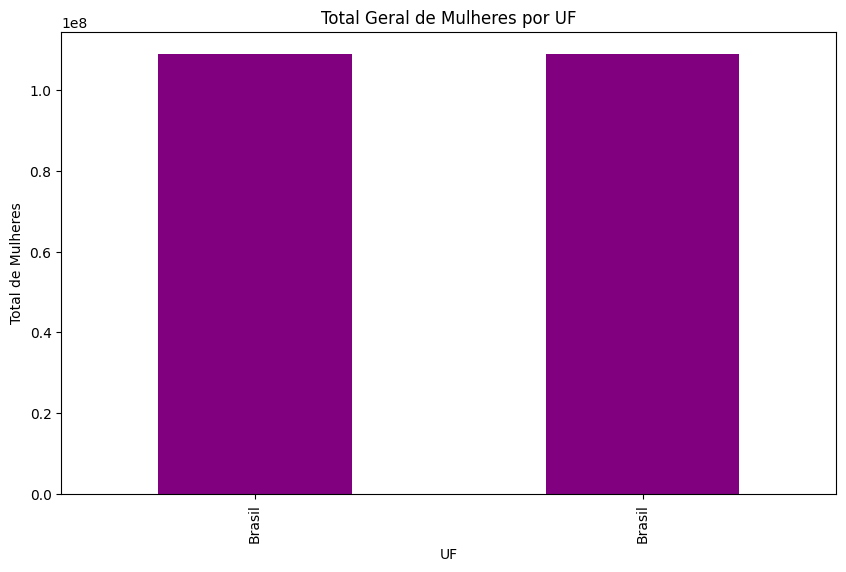

In [101]:
df_mulheres = df_merged[df_merged['Sexo_x'] == 'Feminino'][['UF', 'Total']]

# Criar um gráfico de barras para o total geral de mulheres
df_mulheres.set_index('UF')['Total'].plot(kind='bar', figsize=(10, 6), color='purple')

plt.xlabel('UF')
plt.ylabel('Total de Mulheres')
plt.title('Total Geral de Mulheres por UF')
plt.show()

2. Total de Mulheres que são Mães

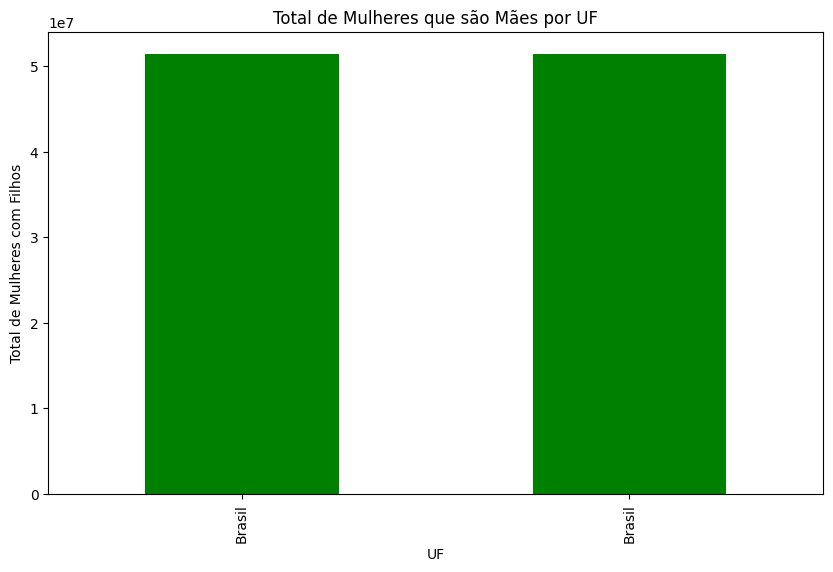

In [102]:
df_maes = df_merged[df_merged['Sexo_x'] == 'Feminino'][['UF', 'Com filho']]

# Criar um gráfico de barras para o total de mulheres que são mães
df_maes.set_index('UF')['Com filho'].plot(kind='bar', figsize=(10, 6), color='green')

plt.xlabel('UF')
plt.ylabel('Total de Mulheres com Filhos')
plt.title('Total de Mulheres que são Mães por UF')
plt.show()

3. Total de Mulheres que Fazem Mestrado e Doutorado

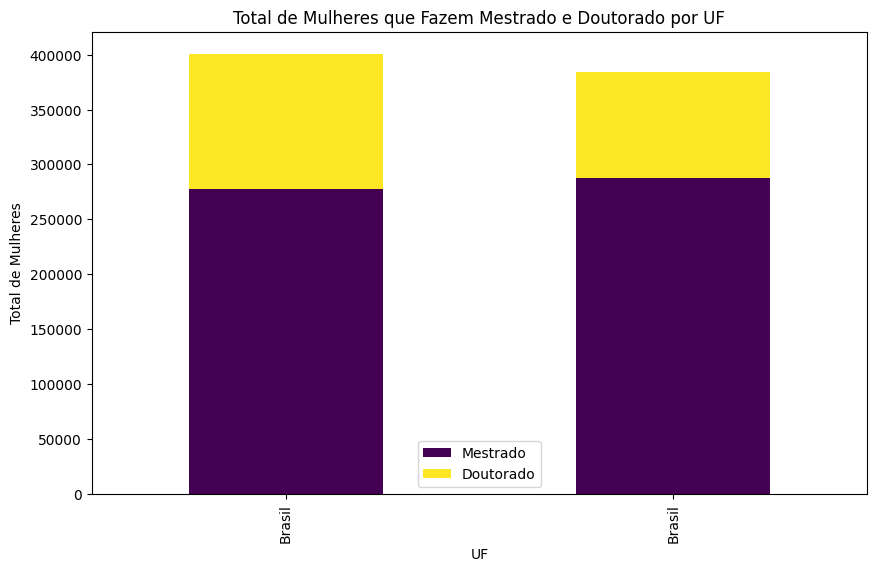

In [103]:
df_pos_graduacao = df_merged[df_merged['Sexo_x'] == 'Feminino'][['UF', 'Mestrado', 'Doutorado']]

# Criar um gráfico de barras empilhadas para o total de mulheres que fazem mestrado e doutorado
df_pos_graduacao.set_index('UF').plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

plt.xlabel('UF')
plt.ylabel('Total de Mulheres')
plt.title('Total de Mulheres que Fazem Mestrado e Doutorado por UF')
plt.show()

**INSIGHTS**

Em construção...
As visualizações precisam de melhorias!